# Clustering and dimensionality reduction

#### <span style="color:#1F618D">The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:</span>
- #### <span style="color:#1F618D">whether the wine is red or white</span>
- #### <span style="color:#1F618D">the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.</span>

#### <span style="color:#1F618D">Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.</span>

#### <span style="color:#1F618D">To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%pylab inline

# for PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# for tSNE
from sklearn.manifold import TSNE
import plotly.express as px

# for Clustering
from sklearn.preprocessing import StandardScaler # to standardize the data for kmeans
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


## Set up the dataset

#### Read the dataset:

In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Drop color and quality to only include the 11 chemicals:

In [3]:
wine_chemicals = wine.drop(columns = ['quality','color'])
wine_chemicals.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Standardize the data for PCA:

In [4]:
standardized = StandardScaler().fit_transform(wine_chemicals)

## PCA

#### Run PCA and graph the explained variance by the number of components:

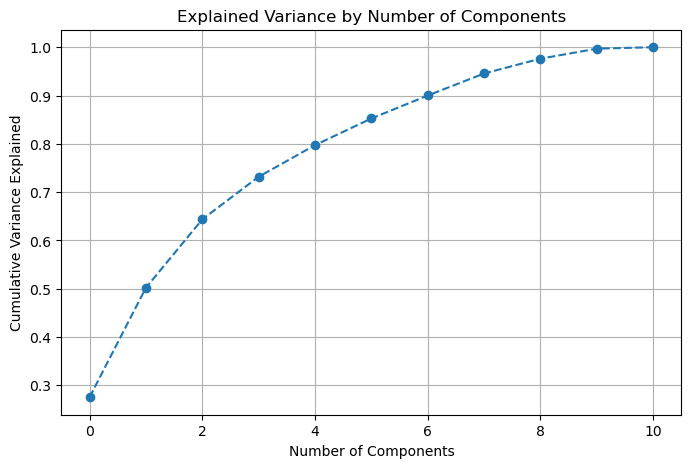

In [5]:
# Run PCA
pca = PCA().fit(standardized)

# Plot the cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

#### Based on the graph of variance explained, I want to choose 4 as the number of PCA components. 4 components can explain about 80% of the total variance. The growth of cumulative explained variance reduces when the number of components is larger than 4.

#### Run a PCA with 4 components:

In [6]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(standardized)

#### Create a new dataframe with the PCAs as columns:

In [7]:
pca_df = pd.DataFrame(data=pca_result, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4'])
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,-3.205996,0.416523,-2.722237,-0.796778
1,-3.039051,1.107462,-2.046952,-0.770225
2,-3.071893,0.878964,-1.742580,-0.802257
3,-1.571262,2.112545,2.592917,-0.292785
4,-3.205996,0.416523,-2.722237,-0.796778


#### Get the feature coefficients for each PCA:

In [8]:
pca_components = pd.DataFrame(pca.components_, columns=wine_chemicals.columns, index=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4'])
pca_components

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
PCA_1,-0.238799,-0.380757,0.152388,0.345920,-0.290113,0.430914,0.487418,-0.044937,-0.218686,-0.294135,-0.106437
PCA_2,0.336355,0.117550,0.183299,0.329914,0.315258,0.071933,0.087266,0.584037,-0.155869,0.191716,-0.465058
PCA_3,0.434301,-0.307259,0.590570,-0.164688,-0.016679,-0.134224,-0.107462,-0.175606,-0.455324,0.070042,0.261101
PCA_4,-0.164346,-0.212785,0.264300,-0.167443,0.244744,0.357279,0.208420,-0.072725,0.414551,0.640536,0.106803


#### Graph a heat map to visualize the feature coefficients:

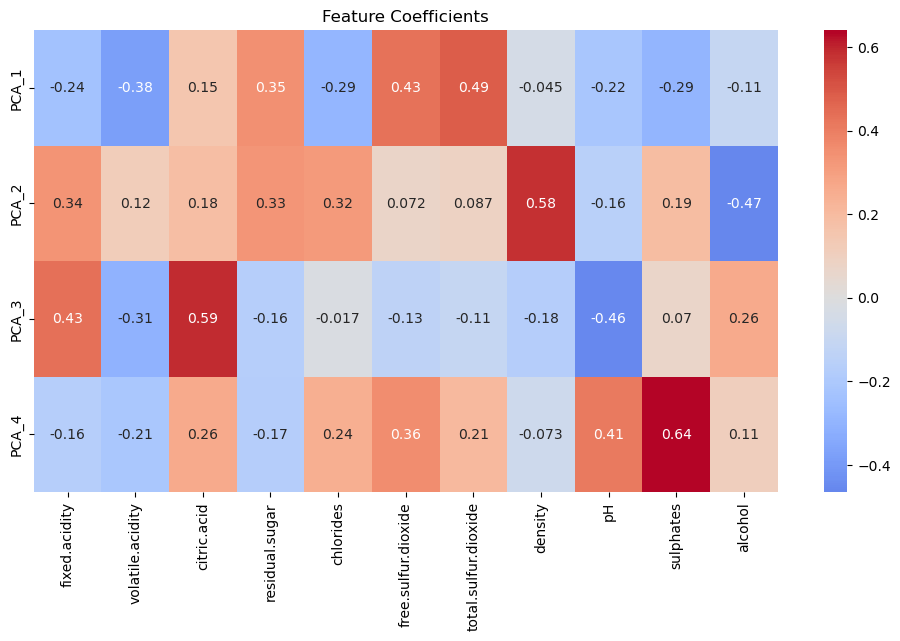

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Coefficients')
plt.show()

#### It seems that the free.sulfur.dioxide and total.sulfur.dioxide are the most important features in PCA 1. Density and alcohol are the most important features in PCA 2. Fixed.acidity, citric.acid, and pH are the most important features in PCA 3. Sulphates and pH are the most important features in PCA 4.

#### Add the color and the quality columns to the PCA dataframe and convert 'color' to a dummy variable

In [10]:
pca_df['color'] = wine['color']
pca_df['quality'] = wine['quality']
pca_df = pd.get_dummies(pca_df, columns=['color'], drop_first=True)
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,quality,color_white
0,-3.205996,0.416523,-2.722237,-0.796778,5,False
1,-3.039051,1.107462,-2.046952,-0.770225,5,False
2,-3.071893,0.878964,-1.742580,-0.802257,5,False
3,-1.571262,2.112545,2.592917,-0.292785,6,False
4,-3.205996,0.416523,-2.722237,-0.796778,5,False


#### Plot a scatter plot to see if each PCA captures the difference between red wine and white wine:

PCA 1 and PCA 2:

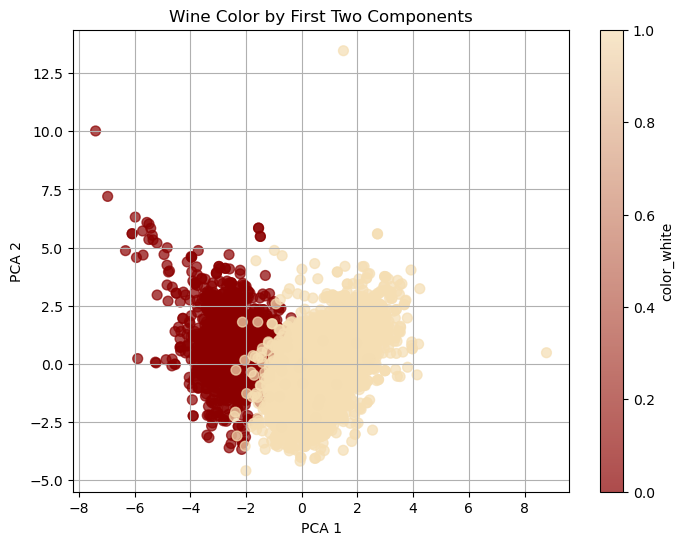

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=pca_df['color_white'], cmap=LinearSegmentedColormap.from_list("custom", [(0,'darkred'), (1,'wheat')]), s=50, alpha=0.7)
plt.title('Wine Color by First Two Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='color_white')
plt.grid(True)
plt.show()


PCA 3 and PCA 4:

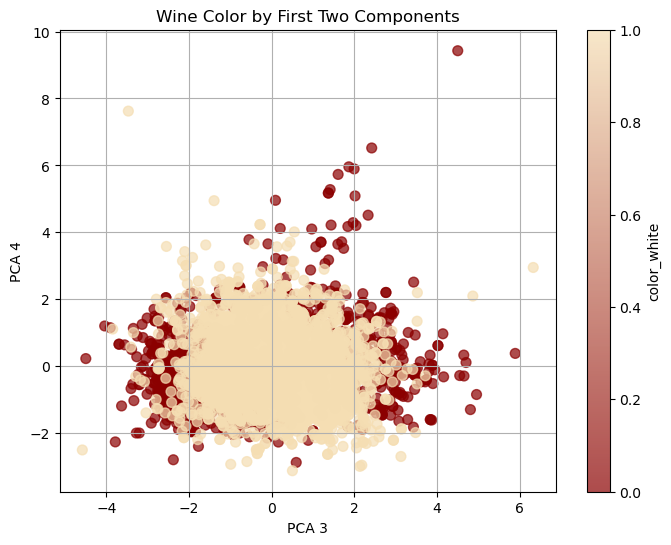

In [12]:
plt.figure(figsize=(8, 6))

plt.scatter(pca_df['PCA_3'], pca_df['PCA_4'], c=pca_df['color_white'], cmap=LinearSegmentedColormap.from_list("custom", [(0,'darkred'), (1,'wheat')]), s=50, alpha=0.7)
plt.title('Wine Color by First Two Components')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.colorbar(label='color_white')
plt.grid(True)
plt.show()


#### It seems that PCA 1 is successfully capturing the difference between red wines and white wines. If PCA 1 is less than -1, the wine is likely to be red and vice versa. Since free.sulfur.dioxide and total.sulfur.dioxide have a large coefficient in terms of absolute value in PCA 1, it can be inferred than sulfur dioxide has a clos relationship to wine color. PCA 2, 3, and 4, on the other hand, are not capturing the difference in wine color.

#### Plot a scatter plot to see if each PCA captures the patterns in wine quality:

PCA 1 and PCA 2:

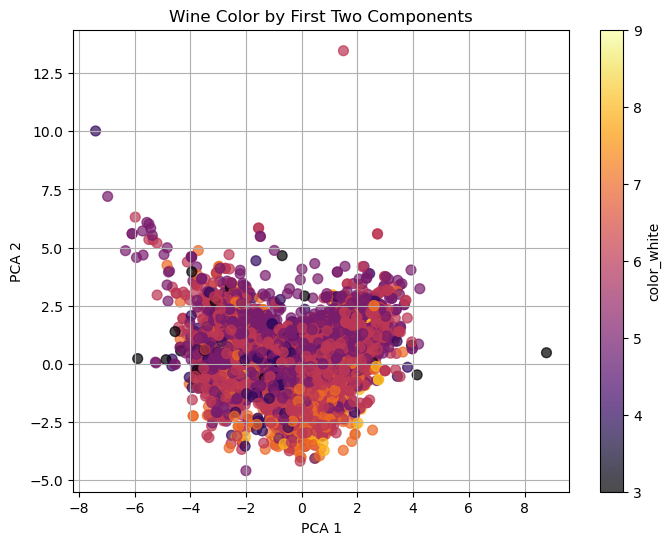

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=pca_df['quality'], cmap='inferno', s=50, alpha=0.7)
plt.title('Wine Color by First Two Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='color_white')
plt.grid(True)
plt.show()

PCA 3 and PCA 4:

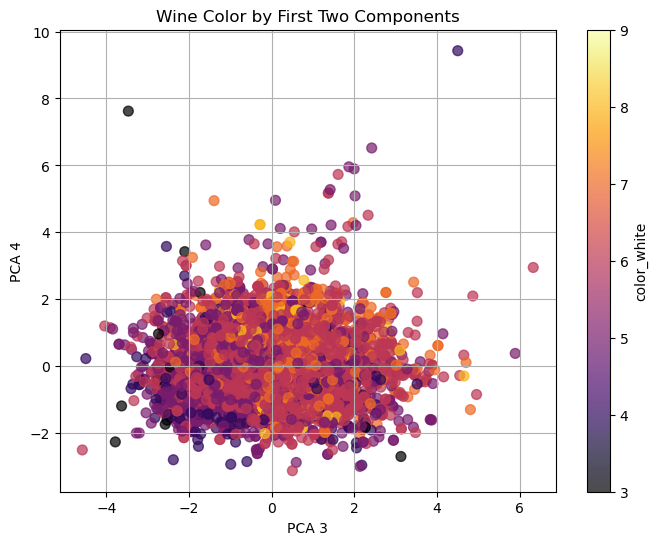

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_3'], pca_df['PCA_4'], c=pca_df['quality'], cmap='inferno', s=50, alpha=0.7)
plt.title('Wine Color by First Two Components')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.colorbar(label='color_white')
plt.grid(True)
plt.show()

#### It seems that PCA 2 and PCA 3 are capturing some of the patterns in wine quality, but not much. Wines with a lower PCA 2 and a higher PCA 3 tend to have a higher quality, as shown by the lighter color of the dots. Since density, alcohol, pH, and critric.acid are important features that make up PCA 2 and PCA 3, these chemicals may have a close relationship with wiine quality.

## tSNE

#### Run a tSNE:

In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200, random_state=10)
tsne_result = tsne.fit_transform(standardized)

/Users/eva/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.005s...
[t-SNE] Computed neighbors for 6497 samples in 0.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.157845
[t-SNE] KL divergence after 1000 iterations: 1.420527


#### Create a new dataframe with the tSNE results as columns and add the wine_white dummy and the quality column to this dataframe:

In [16]:
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['color'] = wine['color']
tsne_df['quality'] = wine['quality']
tsne_df = pd.get_dummies(tsne_df, columns=['color'], drop_first=True)

tsne_df.head()

,Dim1,Dim2,quality,color_white
0,-74.096901,32.767620,5,False
1,-78.397232,20.956102,5,False
2,-77.881096,20.533461,5,False
3,-80.244057,-22.940041,6,False
4,-74.096535,32.768097,5,False


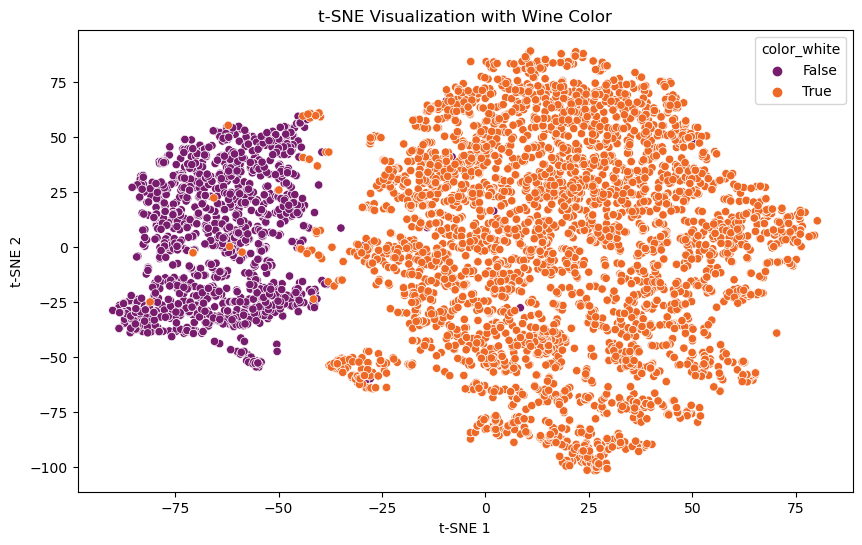

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='color_white', data=tsne_df, palette='inferno')
plt.title("t-SNE Visualization with Wine Color")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='color_white')
plt.show()

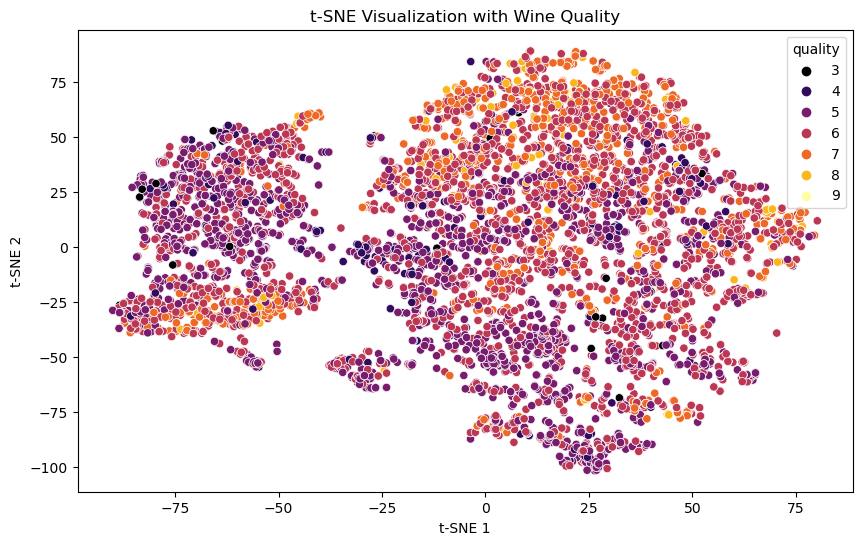

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='quality', data=tsne_df, palette='inferno')
plt.title("t-SNE Visualization with Wine Quality")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='quality')
plt.show()

#### It seems that t-SNE does a good job capturing the differences in the chemicals between red wine and white wine. The observations in the dataset are separated into two clusters. The cluster on the left appears to contain mostly red wines, while the cluster on the right contains mostly white wines. However, the two clusters do not have any implications regarding the quality of the wine. They both contain wines of different qualities, suggesting that t-SNE is not effective at separating wines by their quality.

## K means

#### It seems that both PCA and tSNE are able to distinguish red wine and white wine. Now I would like to run a K-means clustering to see if K-mean can successfully differentiate red wine and white wine.

#### Plot the Elbow plot to choose the number of clusters:

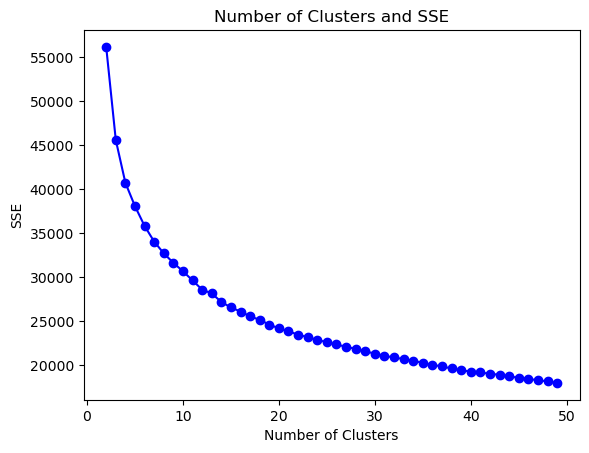

In [18]:
sse = []
for i in range(2, 50):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(standardized)
    sse.append(kmeans.inertia_)
    
plt.plot(range(2, 50), sse, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Number of Clusters and SSE')
plt.show()

#### It seems that 7 clusters is an optimal choice because it reduces a large amount of SSE and is simple enough for my analysis.

#### Run a K-means algorithm with 7 clusters:

In [19]:
kmeans_7 = KMeans(n_clusters=7, random_state=1)
kmeans_label = kmeans_7.fit(standardized)

#### Add a column that record the cluster number of each wine observation:

In [20]:
wine_cluster = wine.copy()
wine_cluster = pd.get_dummies(wine_cluster, columns=['color'], drop_first=True)
wine_cluster['cluster'] = kmeans_7.fit_predict(standardized)
wine_cluster.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color_white,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,5


#### Plot a stacked-bar chart to examine the percentage of white and red wine in each cluster:

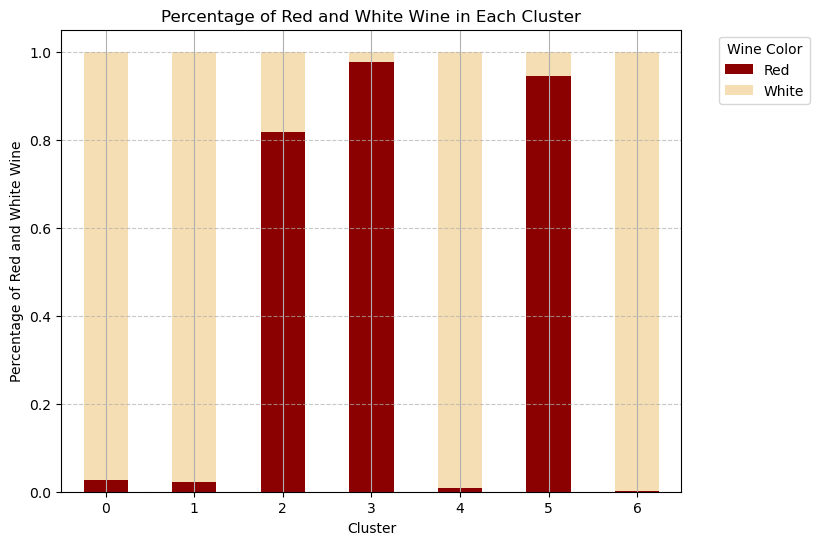

In [21]:
color_wine = wine_cluster.groupby('cluster')['color_white'].value_counts(normalize=True).unstack()
color_wine
color_wine.plot(kind='bar', stacked=True, color=['darkred', 'wheat'], figsize=(8, 6))

plt.title('Percentage of Red and White Wine in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Red and White Wine')
plt.legend(['Red', 'White'], title='Wine Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.grid(True)
plt.xticks(rotation=0)
plt.show()


#### It seems that the K-means clustering method is also able to capture the difference between white wine and red wine. More than 95% of the observations in cluster 0, 1, 4, and 6 are consisted of white wine. More than 80% of the observations in cluster 2, 3, and 5 are consisted of red wine. That said, it does seem that K-means is good at clustering white wine than red wine.

#### Plot a stacked-bar chart to examine the wine quality in each cluster:

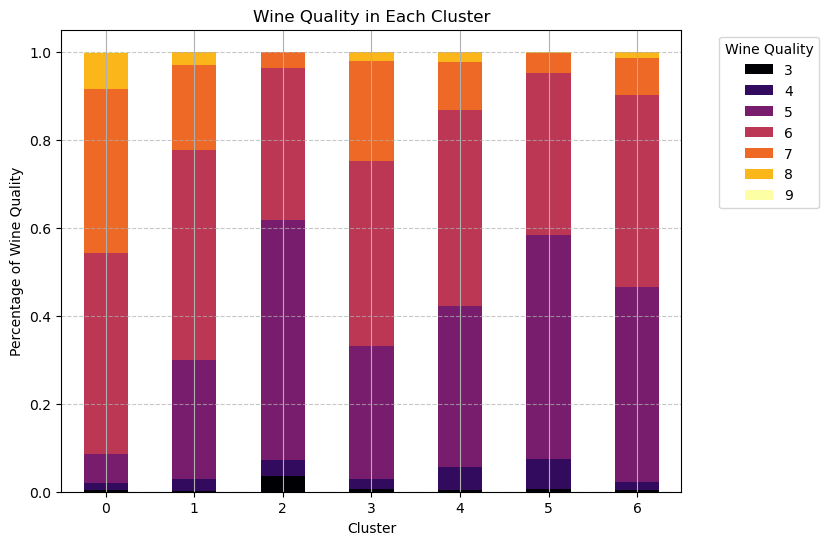

In [22]:
quality_wine = wine_cluster.groupby('cluster')['quality'].value_counts(normalize=True).unstack()
quality_wine
quality_wine.plot(kind='bar', stacked=True, cmap = 'inferno', figsize=(8, 6))

plt.title('Wine Quality in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Wine Quality')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.grid(True)
plt.xticks(rotation=0)
plt.show()


#### K-Means Clustering, like PCA and t-SNE, is not very effective at differentiating wines by their quality. The six clusters contain similar proportions of wines of each quality. Thus, we cannot predict the quality of a wine based on its cluster.
<br><br><br><br><br>